## Heap sort


Sorted inplace
- Worst Case:    O(n log n)  
- Best Case:     O(n log n)  
- Average Case:  O(n log n)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from tqdm import trange
import seaborn as sns; sns.set()

In [2]:
# N is size of heap 
def heapify(arr, N, idx):
    largest = idx # Initialize largest as root 
    left = 2 * idx + 1     # left = 2*i + 1 
    right = left + 1     # right = 2*i + 2 
    
    #compare wirh a child
    if left < N and arr[idx] < arr[left]: 
        largest = left     
    if right < N and arr[largest] < arr[right]: 
        largest = right
    #swap
    if largest != idx: 
        arr[idx], arr[largest] = arr[largest],arr[idx] # swap 
        heapify(arr, N, largest) 
        
def heap_sort(arr): 
    N = len(arr) 
    # Build a maxheap.
    for i in range(N, -1, -1): 
        heapify(arr, N, i) 
        
    for i in range(N-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 
  # Driver code to test above 


# This code is contributed by Mohit Kumra 

### Selection sort

Sorted inplace
- Worst Case: O($n^2$)
- Best Case: O($n^2$)
- Average Case: O($n^2$) 

In [3]:
def selection_sort(A):
    for i in range(len(A)): 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]


#### Сравнение алгоритмов сортировки для массива разной длины

In [4]:
def meusure_time(fun, A, lenghts = [1000]):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    N = 3 # по какому брать среднее
    
    for i in tqdm(lenghts): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(A[:i])
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas

In [94]:
k = 1000
A = np.random.rand(100*k)
B = A.copy()

In [95]:
k = 1000
lenghts1 = [i for i in range(k,100*k,5*k)] # 1 000 000
mas_1 = meusure_time(heap_sort, A ,lenghts1)
#mas_2 = meusure_time(selection_sort, B, lenghts)



100%|██████████████████████████████████████████| 20/20 [01:19<00:00,  7.08s/it]


In [96]:
k = 100
lenghts2 = [i for i in range(k,100*k,5*k)]
mas_2 = meusure_time(selection_sort, B, lenghts2)

100%|██████████████████████████████████████████| 20/20 [06:00<00:00, 40.85s/it]


In [97]:
sns.set()

[0.01726939 0.13049272 0.25590539 0.38721376 0.52249458 0.66078037
 0.80148504 0.94421468 1.08868605 1.23468562 1.38204657 1.53063498
 1.68034094 1.83107265 1.98275224 2.13531284 2.2886964  2.44285205
 2.59773486 2.75330483]


Text(0.5, 1.0, 'Heap_sort для разной длины массива')

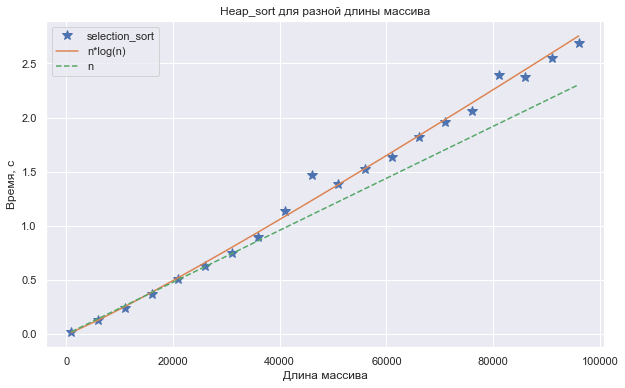

In [98]:
asym = lenghts1*np.log(lenghts1)/1000000*2.5
asym_2 = 2.4*np.array(lenghts1)/100000
print(asym)
plt.figure(figsize = (10,6))
plt.plot(lenghts1, mas_1, '*', label='selection_sort', ms=10)
plt.plot(lenghts1, asym, label ='n*log(n)')
plt.plot(lenghts1, asym_2, '--',label ='n')
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Heap_sort для разной длины массива')

[2.0000e-03 7.2000e-02 2.4200e-01 5.1200e-01 8.8200e-01 1.3520e+00
 1.9220e+00 2.5920e+00 3.3620e+00 4.2320e+00 5.2020e+00 6.2720e+00
 7.4420e+00 8.7120e+00 1.0082e+01 1.1552e+01 1.3122e+01 1.4792e+01
 1.6562e+01 1.8432e+01]


Text(0.5, 1.0, 'Selection_sort ля разной длины массива')

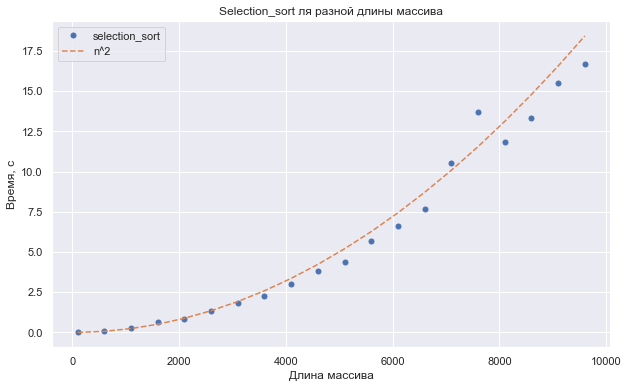

In [100]:

asym = np.array(lenghts2)**2/10000000*2
print(asym)
plt.figure(figsize = (10,6))
plt.plot(lenghts2, mas_2, '.', label='selection_sort', ms=10)
plt.plot(lenghts2, asym, '--', label='n^2' )
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Selection_sort ля разной длины массива')

### Сравнение по степени отсортированности массивов

In [129]:
def bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] > mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]  
def invert_bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] < mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]
def create_table(N):
    """Create inverse sorted massive
    and take bubble to normal sorted massive
    Output: (N, N)
    """
    Mas = np.zeros((N,2*N))
    Mas[:,N] = np.random.randn(N)
    
    for i in range(1,N):
        Mas[:,N+i] = Mas[:,N+i-1]
        bubble(Mas[:,N+i])
    for i in range(1,N+1):
        Mas[:,N-i] = Mas[:,N-i+1]
        invert_bubble(Mas[:,N-i])
    return Mas


In [102]:
Mas_1 = create_table(10000)
print(Mas_1.shape)
print(Mas_1[:10,0], Mas_1[:10,-1])

(10000, 20000)
[4.65246329 4.46703426 3.7173628  3.47238135 3.47119628 3.4504632
 3.43025274 3.35143737 3.34512988 3.32955524] [-3.86407225 -3.49085485 -3.31163671 -3.28913333 -3.25175715 -3.17617844
 -3.15873327 -3.08985101 -3.07968537 -3.06437709]


In [5]:
def meusure_time_2(fun, table):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    #N = 3 # по какому брать среднее
    for i in range(table.shape[1]): # progress bar
        start_time = time.time()
        fun(table[:, i])
        end_time = time.time()
        mas.append(end_time - start_time)
        
        if i%10 == 0:
            print(i, "Completed")
    
    return mas

In [104]:
matrix = Mas_1[:,::200]
print(matrix.shape)
array1 = meusure_time_2(heap_sort, matrix)


(10000, 100)
0 Completed
100 Completed
200 Completed
300 Completed
400 Completed
500 Completed
600 Completed
700 Completed
800 Completed
900 Completed


Text(0.5, 1.0, 'Heap_sort для разных массивов ')

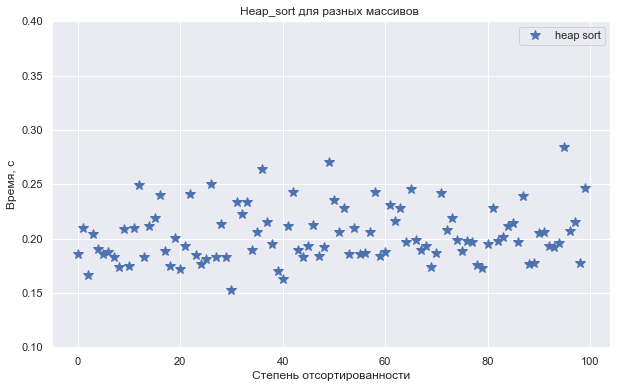

In [114]:

plt.figure(figsize = (10,6))
plt.plot(array1, '*', label='heap sort', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.ylim(0.1, 0.4)
plt.legend()
plt.title('Heap_sort для разных массивов ')

In [15]:
Mas_2 = create_table(2000)
print(Mas_2[:10,0], Mas_2[:10,-1])
matrix2 = Mas_2[:,::50]
print(matrix2.shape)
array2 = meusure_time_2(selection_sort, matrix2)

[3.27299079 3.27067302 3.02598924 2.7327521  2.73120779 2.72721638
 2.6705955  2.54129192 2.51064663 2.50815864] [-3.42871441 -3.16678164 -3.130015   -2.88309941 -2.8035063  -2.74677025
 -2.69490552 -2.65469986 -2.62575307 -2.5816835 ]
(2000, 80)
0 Completed
10 Completed
20 Completed
30 Completed
40 Completed
50 Completed
60 Completed
70 Completed


In [13]:
import seaborn as sns; sns.set()

Text(0.5, 1.0, 'Selection sort для разных массивов')

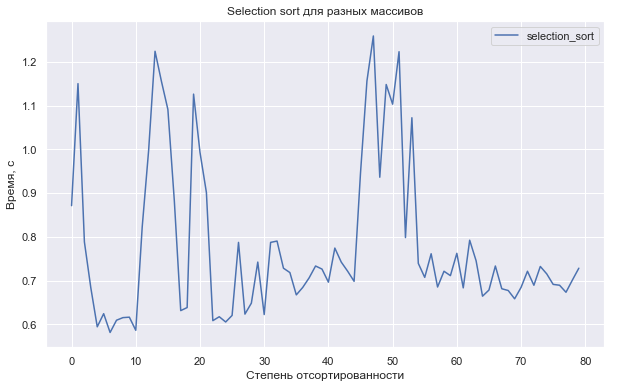

In [16]:

plt.figure(figsize = (10,6))
plt.plot(array2, '-', label='selection_sort', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.legend()
plt.title('Selection sort для разных массивов')

In [18]:
def selection_sort_2(A):
    i = 0
    while i < len(A): 
        min_idx = i
        j = i+1
        while j< len(A):
            if A[min_idx] > A[j]: 
                min_idx = j
            j += 1
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]
        i += 1
        


In [19]:
Mas_2 = create_table(2000)
print(Mas_2[:10,0], Mas_2[:10,-1])
matrix2 = Mas_2[:,::50]
print(matrix2.shape)
array2 = meusure_time_2(selection_sort_2, matrix2)

[3.80504533 3.0285094  2.9655383  2.92603218 2.88900607 2.84966561
 2.82727946 2.68927903 2.67604548 2.63761683] [-3.98792641 -3.73395587 -3.62203144 -3.09075196 -3.08367142 -2.95169292
 -2.89626799 -2.86816858 -2.80476219 -2.72727784]
(2000, 80)
0 Completed
10 Completed
20 Completed
30 Completed
40 Completed
50 Completed
60 Completed
70 Completed


Text(0.5, 1.0, 'Selection sort для разных массивов')

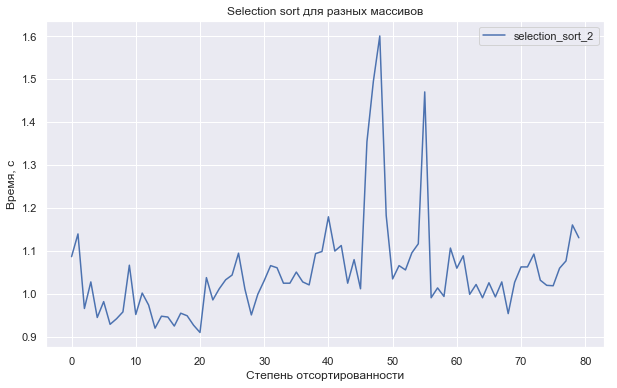

In [20]:

plt.figure(figsize = (10,6))
plt.plot(array2, '-', label='selection_sort_2', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.legend()
plt.title('Selection sort для разных массивов')

### Fixed programm. Number of operation

In [130]:
# n is size of heap 
def heapify(arr, N, idx, num_compare, num_change):
    largest = idx # Initialize largest as root 
    left = 2 * idx + 1     # left = 2*i + 1 
    right = left + 1     # right = 2*i + 2 
    
    #compare wirh a child
    num_compare += 1
    if left < N and arr[idx] < arr[left]: 
        largest = left  
        
    num_compare += 1
    if right < N and arr[largest] < arr[right]: 
        largest = right
    #swap
    num_compare += 1
    if largest != idx: 
        arr[idx], arr[largest] = arr[largest],arr[idx] # swap 
        num_change +=1
        heapify(arr, N, largest, num_compare, num_change) 
    return num_compare, num_change
        
def heap_sort_operate(arr): 
    num_compare = 0
    num_change = 0
    N = len(arr) 
    # Build a maxheap.
    for i in range(N, -1, -1): 
        num_compare, num_change = heapify(arr, N, i, num_compare, num_change) 
        
    for i in range(N-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        num_change +=1
        num_compare, num_change = heapify(arr, i, 0, num_compare, num_change) 
    return  num_compare, num_change

In [131]:
def selection_sort_operate(A):
    num_compare = 0
    num_change = 0
    for i in range(len(A)): 
        min_idx = i 
        for j in range(i+1, len(A)): 
            num_compare += 1
            if A[min_idx] > A[j]: 
                min_idx = j
        num_compare += 1
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]
            num_change += 1
    return num_compare, num_change


In [132]:
def meusure_operation(fun, table):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas1 = []
    mas2 = []
    
    #N = 3 # по какому брать среднее
    for i in range(table.shape[1]): # progress bar
        num_compare, num_change = fun(table[:, i])
        mas1.append(num_compare); mas2.append(num_change)
        if i%10 == 0:
            print(i, "Completed")
    
    return mas1, mas2

In [137]:
massive1 = create_table(200)
massive2 = create_table(200)

select_compare, select_change  = meusure_operation(selection_sort_operate, massive1)
heap_compare, heap_change  = meusure_operation(heap_sort_operate, massive2)

0 Completed
10 Completed
20 Completed
30 Completed
40 Completed
50 Completed
60 Completed
70 Completed
80 Completed
90 Completed
100 Completed
110 Completed
120 Completed
130 Completed
140 Completed
150 Completed
160 Completed
170 Completed
180 Completed
190 Completed
200 Completed
210 Completed
220 Completed
230 Completed
240 Completed
250 Completed
260 Completed
270 Completed
280 Completed
290 Completed
300 Completed
310 Completed
320 Completed
330 Completed
340 Completed
350 Completed
360 Completed
370 Completed
380 Completed
390 Completed
0 Completed
10 Completed
20 Completed
30 Completed
40 Completed
50 Completed
60 Completed
70 Completed
80 Completed
90 Completed
100 Completed
110 Completed
120 Completed
130 Completed
140 Completed
150 Completed
160 Completed
170 Completed
180 Completed
190 Completed
200 Completed
210 Completed
220 Completed
230 Completed
240 Completed
250 Completed
260 Completed
270 Completed
280 Completed
290 Completed
300 Completed
310 Completed
320 Completed


Text(0.5, 1.0, 'Selection vs Heap  number of compare operations')

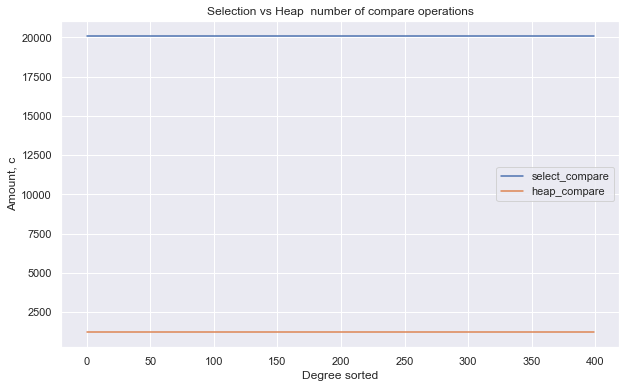

In [138]:

plt.figure(figsize = (10,6))
plt.plot(select_compare, '-', label='select_compare', ms=10)
plt.plot(heap_compare, '-', label='heap_compare', ms=10)
plt.xlabel('Degree sorted'); plt.ylabel('Amount, c')
plt.legend()
plt.title('Selection vs Heap  number of compare operations')

Text(0.5, 1.0, 'Selection vs Heap  number of change operations')

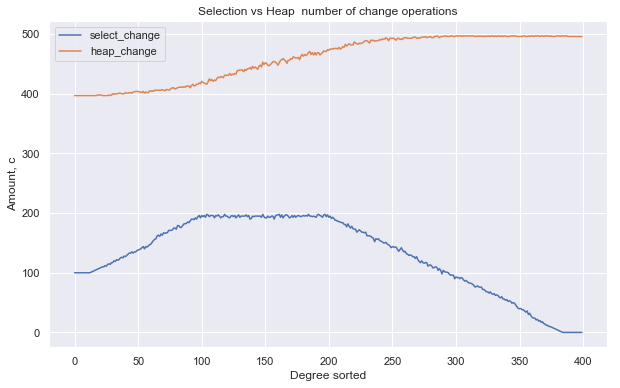

In [139]:
plt.figure(figsize = (10,6))
plt.plot(select_change, '-', label='select_change', ms=10)
plt.plot(heap_change, '-', label='heap_change', ms=10)
plt.xlabel('Degree sorted'); plt.ylabel('Amount, c')
plt.legend()
plt.title('Selection vs Heap  number of change operations')

In [123]:
def bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] > mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]  
def invert_bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] < mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]
def create_table(N):
    """Create inverse sorted massive
    and take bubble to normal sorted massive
    Output: (N, 2*N)
    """
    Mas = np.zeros((N,2*N))
    Mas[:,N] = np.random.randint(20, size = N)
    
    for i in range(1,N):
        Mas[:,N+i] = Mas[:,N+i-1]
        bubble(Mas[:,N+i])
    for i in range(1,N+1):
        Mas[:,N-i] = Mas[:,N-i+1]
        invert_bubble(Mas[:,N-i])
    return Mas

In [128]:
Mas = create_table(10)

for i in range(1, 20):
    print(i,'\t', Mas[:,i], '\t', selection_sort_operate(Mas[:,i-1]) )


1 	 [19. 17. 16. 12.  8.  6.  5.  4.  2.  1.] 	 (55, 5)
2 	 [19. 17. 16. 12.  8.  6.  5.  4.  2.  1.] 	 (55, 5)
3 	 [19. 17. 16. 12.  8.  6.  5.  4.  2.  1.] 	 (55, 5)
4 	 [19. 17. 16. 12.  8.  6.  5.  4.  2.  1.] 	 (55, 5)
5 	 [19. 17. 16. 12.  8.  6.  5.  4.  2.  1.] 	 (55, 5)
6 	 [19. 17. 16.  8. 12.  6.  5.  4.  2.  1.] 	 (55, 5)
7 	 [19. 17.  8. 16.  5. 12.  6.  4.  2.  1.] 	 (55, 6)
8 	 [19. 17.  8.  5. 16.  4. 12.  6.  2.  1.] 	 (55, 7)
9 	 [ 2. 19. 17.  8.  5. 16.  4. 12.  6.  1.] 	 (55, 4)
10 	 [ 2.  1. 19. 17.  8.  5. 16.  4. 12.  6.] 	 (55, 8)
11 	 [ 1.  2. 17.  8.  5. 16.  4. 12.  6. 19.] 	 (55, 8)
12 	 [ 1.  2.  8.  5. 16.  4. 12.  6. 17. 19.] 	 (55, 6)
13 	 [ 1.  2.  5.  8.  4. 12.  6. 16. 17. 19.] 	 (55, 2)
14 	 [ 1.  2.  5.  4.  8.  6. 12. 16. 17. 19.] 	 (55, 4)
15 	 [ 1.  2.  4.  5.  6.  8. 12. 16. 17. 19.] 	 (55, 2)
16 	 [ 1.  2.  4.  5.  6.  8. 12. 16. 17. 19.] 	 (55, 0)
17 	 [ 1.  2.  4.  5.  6.  8. 12. 16. 17. 19.] 	 (55, 0)
18 	 [ 1.  2.  4.  5.  6.  8. 12. 16. 17

In [2]:
a = "a"

In [52]:
'?'<"None"

True